In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [3]:
train_df = pd.read_csv(r"D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\MFCC\mfcc_features_example_buzz1\Train_mfcc_features.csv")
test_df = pd.read_csv(r"D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\MFCC\mfcc_features_example_buzz1\Test_mfcc_features.csv")
val_df = pd.read_csv(r"D:\Workplace\.SPRING2025\AIL303m\Bee_Swarming\MFCC\mfcc_features_example_buzz1\Val_mfcc_features.csv")

In [4]:
train_df = train_df.drop(columns=['file_name'])
test_df = test_df.drop(columns=['file_name'])
val_df = val_df.drop(columns=['file_name'])

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 41 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   label       12600 non-null  int64  
 1   feature_0   12600 non-null  float64
 2   feature_1   12600 non-null  float64
 3   feature_2   12600 non-null  float64
 4   feature_3   12600 non-null  float64
 5   feature_4   12600 non-null  float64
 6   feature_5   12600 non-null  float64
 7   feature_6   12600 non-null  float64
 8   feature_7   12600 non-null  float64
 9   feature_8   12600 non-null  float64
 10  feature_9   12600 non-null  float64
 11  feature_10  12600 non-null  float64
 12  feature_11  12600 non-null  float64
 13  feature_12  12600 non-null  float64
 14  feature_13  12600 non-null  float64
 15  feature_14  12600 non-null  float64
 16  feature_15  12600 non-null  float64
 17  feature_16  12600 non-null  float64
 18  feature_17  12600 non-null  float64
 19  feature_18  12600 non-nul

In [6]:
X_train, y_train = train_df.drop(columns=['label']), train_df['label']
X_test, y_test = test_df.drop(columns=['label']), test_df['label']
X_val, y_val = val_df.drop(columns=['label']), val_df['label']

In [7]:
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}, Val shape: {X_val.shape}")

Train shape: (12600, 40), Test shape: (4841, 40), Val shape: (3600, 40)


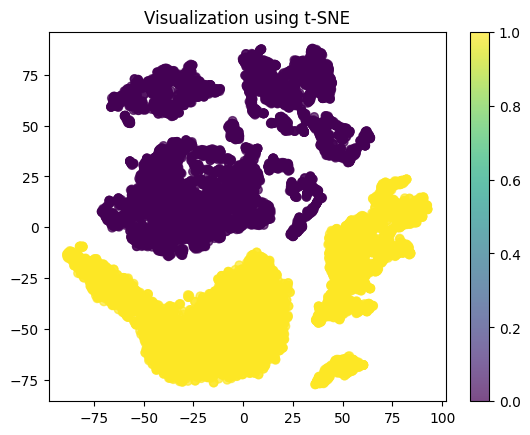

In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Giảm chiều dữ liệu xuống 2D bằng t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

# Vẽ scatter plot
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title("Visualization using t-SNE")
plt.show()


## KNN

In [9]:
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)
X_val_Scaled = scaler.transform(X_val)

In [10]:
param_grid = {
    'n_neighbors': list(range(3, 100, 2)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(
    estimator=knn, param_grid=param_grid, 
    cv=5, scoring='accuracy', n_jobs=-1, verbose=1
)

grid_search.fit(X_val_Scaled, y_val)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Fitting 5 folds for each of 392 candidates, totalling 1960 fits
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.9639


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [13]:
best_knn = KNeighborsClassifier(
    n_neighbors=3, 
    weights='uniform', 
    algorithm='auto'
)

best_knn.fit(X_train_Scaled, y_train)

y_pred_test = best_knn.predict(X_test_Scaled)
y_pred_val = best_knn.predict(X_val_Scaled)

def evaluate_model(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "f1_score": f1_score(y_true, y_pred),
        "classification_report": classification_report(y_true, y_pred, output_dict=True)
    }

test_results = evaluate_model(y_test, y_pred_test)
val_results = evaluate_model(y_val, y_pred_val)

print("\nTest Set Results:")
print(f"Accuracy: {test_results['accuracy']:.4f}")
print(f"F1 Score: {test_results['f1_score']:.4f}")
print("Classification Report:", test_results["classification_report"])

print("\nValidation Set Results:")
print(f"Accuracy: {val_results['accuracy']:.4f}")
print(f"F1 Score: {val_results['f1_score']:.4f}")
print("Classification Report:", val_results["classification_report"])


Test Set Results:
Accuracy: 0.7207
F1 Score: 0.7042
Classification Report: {'0': {'precision': 0.6932153392330384, 'recall': 0.7833333333333333, 'f1-score': 0.7355242566510172, 'support': 2400.0}, '1': {'precision': 0.755753875058713, 'recall': 0.6591560835723065, 'f1-score': 0.7041575492341356, 'support': 2441.0}, 'accuracy': 0.7207188597397232, 'macro avg': {'precision': 0.7244846071458757, 'recall': 0.72124470845282, 'f1-score': 0.7198409029425764, 'support': 4841.0}, 'weighted avg': {'precision': 0.7247494367233238, 'recall': 0.7207188597397232, 'f1-score': 0.7197080755304619, 'support': 4841.0}}

Validation Set Results:
Accuracy: 0.7881
F1 Score: 0.7375
Classification Report: {'0': {'precision': 0.7079823505816285, 'recall': 0.9805555555555555, 'f1-score': 0.8222688096901933, 'support': 1800.0}, '1': {'precision': 0.9683830171635049, 'recall': 0.5955555555555555, 'f1-score': 0.7375300997592019, 'support': 1800.0}, 'accuracy': 0.7880555555555555, 'macro avg': {'precision': 0.83818

## SVM

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [15]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

scaler = StandardScaler()
X_Val_Scaled = scaler.fit_transform(X_val)

svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_Val_Scaled, y_val)

best_C = grid_search.best_params_['C']
print(f"Best C found: {best_C}")

Best C found: 10


In [16]:
svm = SVC(kernel='rbf', C=10, shrinking=False)
svm.fit(X_train_Scaled, y_train)

y_pred_test = svm.predict(X_test_Scaled)
y_pred_val = svm.predict(X_val_Scaled)

def evaluate_model(y_true, y_pred, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    print(f"{dataset_name} Performance:")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   F1 Score: {f1:.4f}\n")
    print("Classification Report:\n", report)

    return {"accuracy": accuracy, "f1_score": f1, "report": report}

test_results = evaluate_model(y_test, y_pred_test, "Test Set (Scaled MFCC)")
val_results = evaluate_model(y_val, y_pred_val, "Validation Set (Scaled MFCC)")

Test Set (Scaled MFCC) Performance:
   Accuracy: 0.8409
   F1 Score: 0.8175

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.98      0.86      2400
           1       0.97      0.71      0.82      2441

    accuracy                           0.84      4841
   macro avg       0.87      0.84      0.84      4841
weighted avg       0.87      0.84      0.84      4841

Validation Set (Scaled MFCC) Performance:
   Accuracy: 0.8631
   F1 Score: 0.8477

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.88      1800
           1       0.95      0.76      0.85      1800

    accuracy                           0.86      3600
   macro avg       0.88      0.86      0.86      3600
weighted avg       0.88      0.86      0.86      3600



In [17]:
def imbalance_ratio(y):
    counts = pd.Series(y).value_counts()
    return counts.max() / counts.min()

print("Imbalance Ratio in Train Set:", imbalance_ratio(y_train))
print("Imbalance Ratio in Test Set:", imbalance_ratio(y_test))
print("Imbalance Ratio in Validation Set:", imbalance_ratio(y_val))

Imbalance Ratio in Train Set: 1.0
Imbalance Ratio in Test Set: 1.0170833333333333
Imbalance Ratio in Validation Set: 1.0


## NB

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score

nb_raw = GaussianNB()

nb_raw.fit(X_train, y_train)

y_test_pred_raw = nb_raw.predict(X_test)
y_val_pred_raw = nb_raw.predict(X_val)

def evaluate_model(y_true, y_pred, model_type):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_type} Model Performance:")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   F1 Score: {f1:.4f}")
    return accuracy, f1

print("\nEvaluating Naïve Bayes on Raw MFCC Features:")
test_results_raw = evaluate_model(y_test, y_test_pred_raw, "NB Raw (Test)")
val_results_raw = evaluate_model(y_val, y_val_pred_raw, "NB Raw (Validation)")



Evaluating Naïve Bayes on Raw MFCC Features:

NB Raw (Test) Model Performance:
   Accuracy: 0.8670
   F1 Score: 0.8820

NB Raw (Validation) Model Performance:
   Accuracy: 0.7931
   F1 Score: 0.8175


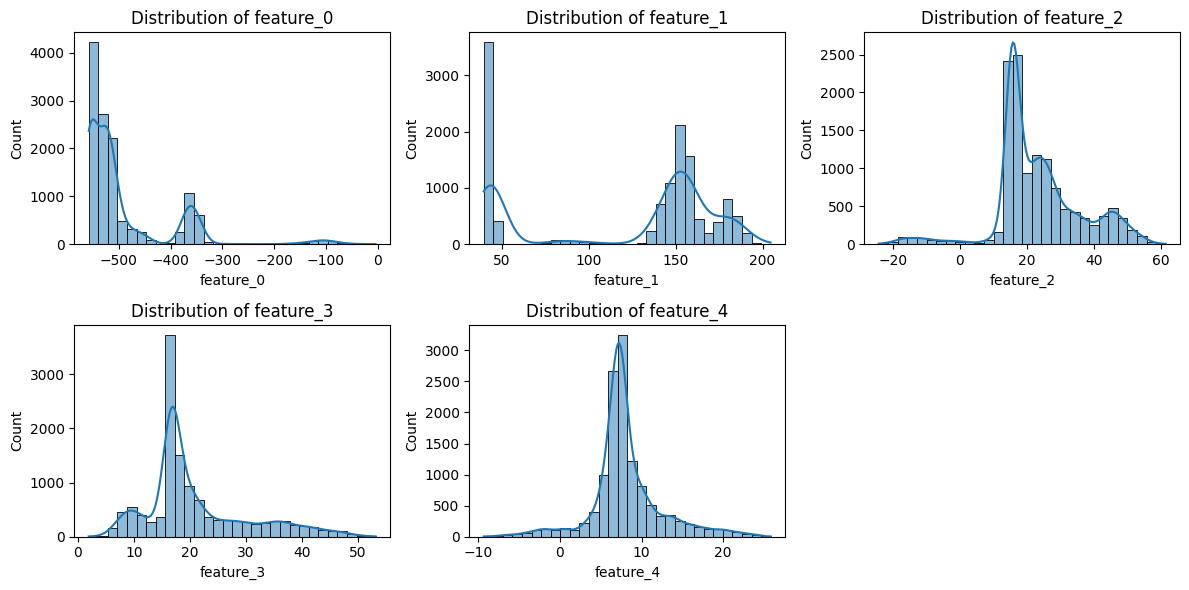

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chọn một số đặc trưng MFCC để kiểm tra
mfcc_cols = X_train.columns[:5]  # Chọn 5 đặc trưng đầu tiên

# Vẽ histogram
plt.figure(figsize=(12, 6))
for i, col in enumerate(mfcc_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


## RF


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

# Grid Search để tìm giá trị n_estimators tối ưu
param_grid = {'n_estimators': list(range(25, 201, 5))}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Lấy giá trị tốt nhất từ Grid Search
best_n_estimators = grid_search.best_params_['n_estimators']
print("Best n_estimators:", best_n_estimators)

# Train RandomForest với n_estimators tối ưu
rf_selected = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
rf_selected.fit(X_train, y_train)

# Dự đoán trên tập Test và Validation
y_test_pred = rf_selected.predict(X_test)
y_val_pred = rf_selected.predict(X_val)

# Hàm đánh giá mô hình
def evaluate_model(y_true, y_pred, model_type):
    precision = precision_score(y_true, y_pred, average="binary")
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_type} Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Classification Report:\n{classification_report(y_true, y_pred)}")
    return precision, accuracy, f1

# Đánh giá mô hình trên Test và Validation Set
print("\nEvaluating Model after Grid Search:")
test_results = evaluate_model(y_test, y_test_pred, "RF (Test)")
val_results = evaluate_model(y_val, y_val_pred, "RF (Validation)")


Best n_estimators: 45

Evaluating Model after Grid Search:

RF (Test) Model Performance:
Accuracy: 0.9217
F1 Score: 0.9279
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      2400
           1       0.87      1.00      0.93      2441

    accuracy                           0.92      4841
   macro avg       0.93      0.92      0.92      4841
weighted avg       0.93      0.92      0.92      4841


RF (Validation) Model Performance:
Accuracy: 0.9269
F1 Score: 0.9217
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1800
           1       0.99      0.86      0.92      1800

    accuracy                           0.93      3600
   macro avg       0.93      0.93      0.93      3600
weighted avg       0.93      0.93      0.93      3600



### GB

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
gb_clf = GradientBoostingClassifier(random_state=50)
grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Gradient Boosting Parameters:")
print(grid_search.best_params_)

y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

print("\nEvaluating Gradient Boosting on Validation Set:")
evaluate_model(y_val, y_val_pred, "Gradient Boosting (Validation)")
print("\nEvaluating Gradient Boosting on Test Set:")
evaluate_model(y_test, y_test_pred, "Gradient Boosting (Test)")

Best Gradient Boosting Parameters:
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}

Evaluating Gradient Boosting on Validation Set:

Gradient Boosting (Validation) Model Performance:
Accuracy: 0.7831
F1 Score: 0.8217
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.57      0.72      1800
           1       0.70      1.00      0.82      1800

    accuracy                           0.78      3600
   macro avg       0.85      0.78      0.77      3600
weighted avg       0.85      0.78      0.77      3600


Evaluating Gradient Boosting on Test Set:

Gradient Boosting (Test) Model Performance:
Accuracy: 0.6693
F1 Score: 0.7530
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50      2400
           1       0.60      1.00      0.75      2441

    accuracy                           0.67      4841
   macro avg       0.80      0.67      0.63      4841
weig

(0.6039089559623948, 0.669283205949184, 0.7530464291223199)